In [37]:
import MDAnalysis as mda
import warnings
# suppress some MDAnalysis warnings about PSF files
warnings.filterwarnings('ignore')
from MDAnalysis.analysis import align
import nglview as nv
from MDAnalysis.analysis import rms
from MDAnalysis.analysis import dihedrals
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Initialize Universe with Gromacs files
u = mda.Universe('npt_modified.gro', 'centered_nojump_md.xtc')

# Align and average structure
average = align.AverageStructure(u, u, select='protein and name CA', ref_frame=0).run()
ref = average.results.universe
aligner = align.AlignTraj(u, ref, select='protein and name CA', in_memory=True).run()

# Select a specific segment
u = u.select_atoms ('all')
alpha = u.select_atoms('bynum 1:4368')
ct_alpha = u.select_atoms('bynum 4368:4505')
beta = u.select_atoms('bynum 4506:8802')
ct_beta = u.select_atoms('bynum 8802:9035')
stalk = u.select_atoms('bynum 9036:9808', 'bynum 10732 :11596')
mtbd = u.select_atoms('bynum 9809:10726')
tublin = alpha+beta
ctails = ct_alpha + ct_beta
sys_wo_ct_stalk = u - ctails - stalk
mtbd_stalk = stalk+mtbd

In [6]:
def setup_plot(x_label, y_label, xmin=None, xmax=None, ymin=None, ymax=None):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.tick_params(labelsize=12)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)


    return fig, ax


In [42]:
def calculate_rmsf(selection):
    rmsf_per_residue = []
    for residue in selection.residues:
        rmsf = rms.RMSF(residue.atoms).run()
        rmsf_per_residue.append(np.mean(rmsf.rmsf))
    return rmsf_per_residue

# Define your selections
selections = {
    'Alpha': alpha,
    'Ct_Alpha': ct_alpha,
}

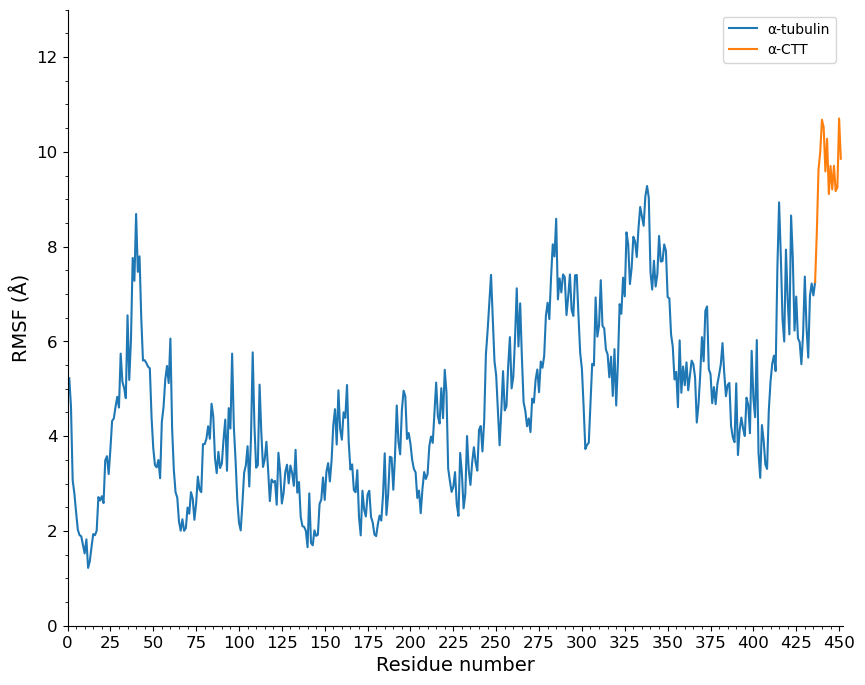

In [21]:
import matplotlib.ticker as ticker

# Initialize the plot
xmin = 0
ymin = 0
xmax = 452
ymax = 13
fig, ax = setup_plot('Residue number', 'RMSF (Å)')

# Set the x and y limits of the plot
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

x_ticks = np.arange(0, xmax, 25)  # Replace 50 with the desired tick interval
y_ticks = np.arange(0, ymax+1, 2)  # Replace 2 with the desired tick interval

# Set major ticks
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

# Calculate RMSF for each selection and plot
for name, selection in selections.items():
    rmsf = calculate_rmsf(selection)
    ax.plot(selection.residues.resids, rmsf, label=name)

# Add legend to the plot
plt.legend(['α-tubulin', 'α-CTT'])

# Create minor ticks
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))  # Default is 4 minor ticks between major ticks
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())  # Adjust as needed

# Save the plot as png with 300 dpi
plt.savefig("Final Graphs/rmsf_alpha_plot.png", dpi=300)

# Display the plot
plt.show()


In [36]:
def calculate_rmsf(selection):
    rmsf_per_residue = []
    for residue in selection.residues:
        rmsf = rms.RMSF(residue.atoms).run()
        rmsf_per_residue.append(np.mean(rmsf.rmsf))
    return rmsf_per_residue

# Define your selections
selections = {
    'Beta': beta,
    'Ct_Beta': ct_beta,
}

# Calculate RMSF for Ct_Beta
rmsf, resnames, resids = calculate_rmsf(ct_beta)
print("RMSF for Ct_Beta:")
for val, resname, resid in zip(rmsf, resnames, resids):
    print(f"Residue {resid} ({resname}): {val}")

ValueError: too many values to unpack (expected 3)

In [35]:


# Calculate RMSF for Ct_Beta
rmsf, resnames, resids = calculate_rmsf(ct_beta)
print("RMSF for Ct_Beta:")
for val, resname, resid in zip(rmsf, resnames, resids):
    print(f"Residue {resid} ({resname}): {val}")


RMSF for Ct_Beta:
Residue 426 (GLN): 3.249115357247381
Residue 427 (ASP): 3.352444783853009
Residue 428 (ALA): 3.1722045711684537
Residue 429 (THR): 3.2069791856105234
Residue 430 (ALA): 3.228649137984959
Residue 431 (GLU): 3.2526626397675167
Residue 432 (GLU): 3.3178222690168213
Residue 433 (GLU): 3.395955283003325
Residue 434 (GLY): 3.538892018661246
Residue 435 (GLU): 3.480855152413326
Residue 436 (MET): 3.27999349761632
Residue 437 (TYR): 3.491814336188377
Residue 438 (GLU): 3.2031435733052365
Residue 439 (ASP): 3.1010139116459405
Residue 440 (ASP): 3.3659653558857836
Residue 441 (GLU): 3.3624157512787676
Residue 442 (GLU): 3.4956581379636558
Residue 443 (GLU): 3.831206883943801
Residue 444 (SER): 3.826716286638014
Residue 445 (GLU): 3.432311760458575
Residue 446 (ALA): 3.6263069874688134
Residue 447 (GLN): 3.5904910692655645
Residue 448 (GLY): 3.839103500373933
Residue 449 (PRO): 3.730326045112927
Residue 450 (LYS): 4.290753778798478


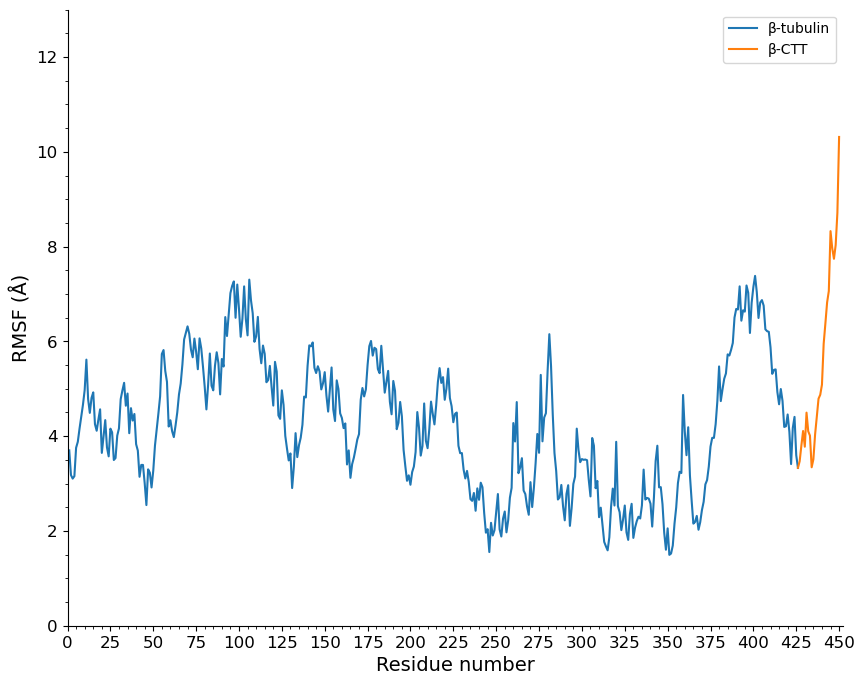

In [23]:
import matplotlib.ticker as ticker

# Initialize the plot
xmin = 0
ymin = 0
xmax = 452
ymax = 13
fig, ax = setup_plot('Residue number', 'RMSF (Å)')

# Set the x and y limits of the plot
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

x_ticks = np.arange(0, xmax, 25)  # Replace 50 with the desired tick interval
y_ticks = np.arange(0, ymax+1, 2)  # Replace 2 with the desired tick interval

# Set major ticks
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

# Calculate RMSF for each selection and plot
for name, selection in selections.items():
    rmsf = calculate_rmsf(selection)
    ax.plot(selection.residues.resids, rmsf, label=name)

# Add legend to the plot
plt.legend(['β-tubulin', 'β-CTT'])


# Create minor ticks
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))  # Default is 4 minor ticks between major ticks
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())  # Adjust as needed

# Save the plot as png with 300 dpi
plt.savefig("Final Graphs/rmsf_beta_plot.png", dpi=300)

# Display the plot
plt.show()


For mtbd, the top ten residues with highest RMSF values are:
Residue 3331 (SER): RMSF 8.061907907183624
Residue 3333 (THR): RMSF 7.521618754156133
Residue 3336 (LYS): RMSF 7.139454709712122
Residue 3332 (THR): RMSF 7.137071331636147
Residue 3334 (ASP): RMSF 6.994368222788728
Residue 3375 (PRO): RMSF 6.820309575852803
Residue 3373 (SER): RMSF 6.762212709361308
Residue 3369 (LYS): RMSF 6.758987543969645
Residue 3312 (ASN): RMSF 6.743561183658494
Residue 3337 (GLN): RMSF 6.68251478185725
Residue 3374 (ASN): RMSF 6.567891648803518
Residue 3335 (TRP): RMSF 6.503132624015259
Residue 3344 (ARG): RMSF 6.474708570034684
Residue 3366 (LYS): RMSF 6.466794574226489
Residue 3370 (ASN): RMSF 6.457736723704023
Residue 3376 (SER): RMSF 6.441339492784247
Residue 3368 (LYS): RMSF 6.34850252812638
Residue 3361 (ASP): RMSF 6.3479770398430055
Residue 3314 (PRO): RMSF 6.344231320601098
Residue 3365 (GLU): RMSF 6.337653566297108


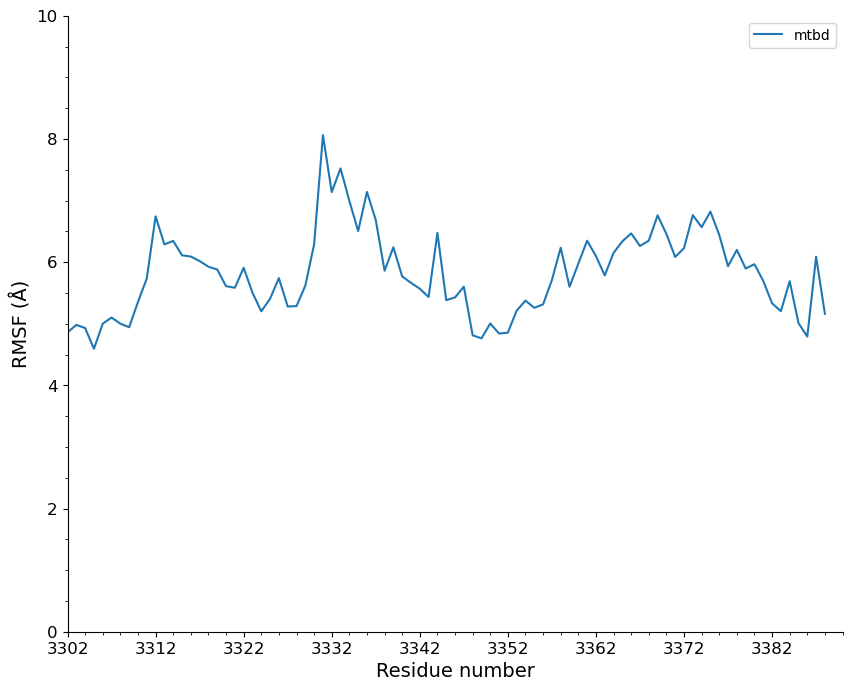

In [24]:
def calculate_rmsf(selection):
    rmsf_data = []
    for residue in selection.residues:
        rmsf = rms.RMSF(residue.atoms).run()
        rmsf_avg = np.mean(rmsf.rmsf)
        rmsf_data.append((rmsf_avg, residue.resid, residue.resname))
    return rmsf_data

# Define your selections
selections = {
    'mtbd': mtbd,
}

import matplotlib.ticker as ticker

# Initialize the plot
xmin = 3302
ymin = 0
xmax = 3390
ymax = 10

fig, ax = setup_plot('Residue number', 'RMSF (Å)')

# Set the x and y limits of the plot
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

x_ticks = np.arange(xmin, xmax+1, 10)  # Replace 50 with the desired tick interval
y_ticks = np.arange(ymin, ymax+1, 2)


# Set major ticks
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

# Calculate RMSF for each selection and plot
for name, selection in selections.items():
    rmsf_data = calculate_rmsf(selection)
    rmsf_values = [data[0] for data in rmsf_data]
    resids = [data[1] for data in rmsf_data]
    ax.plot(resids, rmsf_values, label=name)
    
    # Sort the data by RMSF values
    rmsf_data.sort()
    # The last ten elements in the sorted list have the highest RMSF
    top_ten_rmsf = rmsf_data[-20:]
    print(f"For {name}, the top ten residues with highest RMSF values are:")
    for rmsf, resid, resname in reversed(top_ten_rmsf):  # reverse to start from highest
        print(f"Residue {resid} ({resname}): RMSF {rmsf}")

# Add legend to the plot
plt.legend()

# Create minor ticks
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())  # Default is 4 minor ticks between major ticks
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())  # Adjust as needed

# Save the plot as png with 300 dpi
plt.savefig("Final Graphs/rmsf_plot_MTBD_final.png", dpi=300)

# Display the plot
plt.show()



In [40]:
def calculate_rmsf(selection):
    rmsf_data = []
    for residue in selection.residues:
        rmsf = rms.RMSF(residue.atoms).run()
        rmsf_avg = np.mean(rmsf.rmsf)
        rmsf_data.append((rmsf_avg, residue.resid, residue.resname))
    return rmsf_data

# Define your selections
selections = {
    'Ct_Beta': ct_beta,
}

In [41]:
for name, selection in selections.items():
    rmsf_data = calculate_rmsf(selection)
    rmsf_values = [data[0] for data in rmsf_data]
    resids = [data[1] for data in rmsf_data]
    ax.plot(resids, rmsf_values, label=name)
    
    # Sort the data by RMSF values
    rmsf_data.sort()
    # The last twenty elements in the sorted list have the highest RMSF
    top_twenty_rmsf = rmsf_data[-20:]
    print(f"For {name}, the top twenty residues with highest RMSF values are:")
    for rmsf, resid, resname in reversed(top_twenty_rmsf):  # reverse to start from highest
        print(f"Residue {resid} ({resname}): RMSF {rmsf}")

For Ct_Beta, the top twenty residues with highest RMSF values are:
Residue 450 (LYS): RMSF 10.314862397771638
Residue 449 (PRO): RMSF 8.713608392350395
Residue 445 (GLU): RMSF 8.327604492995995
Residue 448 (GLY): RMSF 8.032919705337434
Residue 446 (ALA): RMSF 7.965796167473702
Residue 447 (GLN): RMSF 7.743952912571505
Residue 444 (SER): RMSF 7.0627700021748065
Residue 443 (GLU): RMSF 6.82110958222012
Residue 442 (GLU): RMSF 6.377818965291107
Residue 441 (GLU): RMSF 5.950014925639353
Residue 440 (ASP): RMSF 5.08669775165698
Residue 439 (ASP): RMSF 4.873866636879352
Residue 438 (GLU): RMSF 4.7906063471529565
Residue 431 (GLU): RMSF 4.497029017396018
Residue 437 (TYR): RMSF 4.411291284023325
Residue 429 (THR): RMSF 4.109423724318976
Residue 432 (GLU): RMSF 4.103203596672172
Residue 436 (MET): RMSF 4.037408536158652
Residue 433 (GLU): RMSF 4.0113277681393
Residue 428 (ALA): RMSF 3.8039888562399806


In [43]:
def calculate_rmsf(selection):
    rmsf_data = []
    for residue in selection.residues:
        rmsf = rms.RMSF(residue.atoms).run()
        rmsf_avg = np.mean(rmsf.rmsf)
        rmsf_data.append((rmsf_avg, residue.resid, residue.resname))
    return rmsf_data

# Define your selections
selections = {
    'Ct_Alpha': ct_alpha,
}

for name, selection in selections.items():
    rmsf_data = calculate_rmsf(selection)
    rmsf_values = [data[0] for data in rmsf_data]
    resids = [data[1] for data in rmsf_data]
    ax.plot(resids, rmsf_values, label=name)
    
    # Sort the data by RMSF values
    rmsf_data.sort()
    # The last twenty elements in the sorted list have the highest RMSF
    top_twenty_rmsf = rmsf_data[-20:]
    print(f"For {name}, the top twenty residues with highest RMSF values are:")
    for rmsf, resid, resname in reversed(top_twenty_rmsf):  # reverse to start from highest
        print(f"Residue {resid} ({resname}): RMSF {rmsf}")


For Ct_Alpha, the top twenty residues with highest RMSF values are:
Residue 450 (GLU): RMSF 10.704728740763626
Residue 440 (VAL): RMSF 10.678370979892332
Residue 441 (GLU): RMSF 10.518696911836575
Residue 443 (GLU): RMSF 10.276298644890218
Residue 439 (SER): RMSF 9.998776890437256
Residue 451 (TYR): RMSF 9.854534075843318
Residue 447 (GLU): RMSF 9.705952605521867
Residue 445 (GLU): RMSF 9.703612752864236
Residue 438 (ASP): RMSF 9.624758538910193
Residue 442 (GLY): RMSF 9.588162574897265
Residue 449 (GLU): RMSF 9.250256144646585
Residue 446 (GLU): RMSF 9.207998702444979
Residue 448 (GLY): RMSF 9.172565486267308
Residue 444 (GLY): RMSF 9.109055037441006
Residue 437 (VAL): RMSF 8.290365830548652
Residue 436 (GLY): RMSF 7.248982140895016
